***

## K-means Clustering

***

### Data Preprocessing

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Importing Dataset

In [2]:
df = pd.read_csv('C:/Users/HP Elitebook/OneDrive/Bureau/HOMEWORKS/PYTHON/ML_BOOTCAMP/Machine Learning A-Z (Codes and Datasets)/Part 4 - Clustering/Section 24 - K-Means Clustering/Python/Mall_Customers.csv')
X = df.iloc[:,[3,4]].values

### Using the Elbows method to identify optimal number of clusters

C:\Users\HP Elitebook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


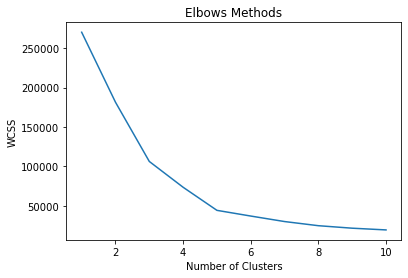

In [3]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbows Methods')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

We can see on the plot that at 5 clusters the curve starts to slowly downwardslop. So we can take 5 like our optimal number of clusters to train our data.

In [4]:
k_ = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = k_.fit_predict(X)

### Visualization

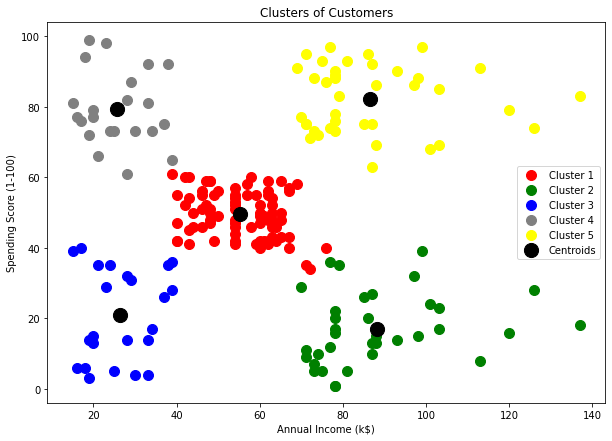

In [5]:
plt.figure(figsize =(10,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'grey', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'yellow', label = 'Cluster 5')
plt.scatter(k_.cluster_centers_[:, 0], k_.cluster_centers_[:, 1],s = 200, c = 'black', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()